In [65]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# in this tutorial, we will generate our samples ourselves
# with nsamples in each category
nexamples = 500

In [66]:
normal = np.random.multivariate_normal
# squared width
s2 = 1
# below we provide the coordinates of the mean as a first argument
# and then the covariance matrix
# we generate nexamples for each categories
sgx0 = normal([0., 0.], [[s2, 0.], [0., s2]], nexamples)
sgx1 = normal([2., 2.], [[s2, 0.], [0., s2]], nexamples)
# setting the labels for each category
sgy0 = np.zeros((nexamples,))
sgy1 = np.ones((nexamples,))

In [67]:
print(f"sgx0 : \n {sgx0[:5]}")
print(f"sgx1 : \n {sgx1[:5]}")

sgx0 : 
 [[ 2.04193205  0.39930288]
 [-0.16248536  0.88533045]
 [ 1.16912925  0.74923415]
 [ 0.30888826 -0.47042063]
 [-0.00306797 -0.42048414]]
sgx1 : 
 [[2.87240606 0.28864309]
 [1.78217634 1.73197869]
 [2.25279862 2.88710728]
 [2.48803668 2.86757413]
 [0.76121465 2.30661   ]]


In [68]:
print(f"sgy0 : \n {sgy0[:5]}")
print(f"sgy1 : \n {sgy1[:5]}")

sgy0 : 
 [0. 0. 0. 0. 0.]
sgy1 : 
 [1. 1. 1. 1. 1.]


Text(0, 0.5, 'x2')

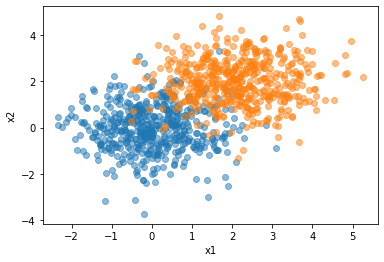

In [69]:
plt.scatter(sgx0[:,0], sgx0[:,1], alpha=0.5)
plt.scatter(sgx1[:,0], sgx1[:,1], alpha=0.5)
plt.xlabel("x1")
plt.ylabel("x2")

In [70]:
sgx = np.concatenate((sgx0, sgx1))
sgy = np.concatenate((sgy0, sgy1))
print(sgx.shape, sgy.shape)

(1000, 2) (1000,)


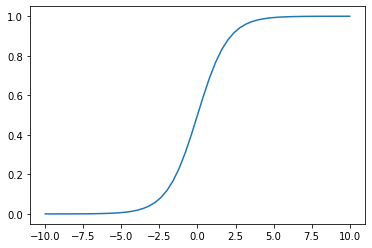

In [71]:
# define parameters
# the bias
b = 0
# the weight
w = 1
def sigmoid(x1):
    # z is a linear function of x1
    z = w * x1 + b
    return 1 / (1 + np.exp(-z))
# create an array of evenly spaced values
linx = np.linspace(-10, 10, 51)
plt.plot(linx, sigmoid(linx))

In [72]:
# 2D sigmoid
# bias
b = 0
# x1 weight
w1 = 1
# x2 weight
w2 = 2
def sigmoid_2d(x1, x2):
    # z is a linear function of x1 and x2
    z = w1 * x1 + w2 * x2 + b
    return 1 / (1 + np.exp(-z))

In [73]:
xmin, xmax, npoints= (-6, 6, 51)
linx1 = np.linspace(xmin, xmax, npoints)
# no need for a new array, we juste reuse the one we have with another name
linx2 = linx1

In [74]:
gridx1, gridx2 = np.meshgrid(np.linspace(xmin, xmax, npoints), np.linspace(xmin, xmax, npoints))
print(gridx1.shape, gridx2.shape)
print(f"gridx1 : \n {gridx1[:1]}")
print(f"gridx2 : \n {gridx2[:1]}")

(51, 51) (51, 51)
gridx1 : 
 [[-6.   -5.76 -5.52 -5.28 -5.04 -4.8  -4.56 -4.32 -4.08 -3.84 -3.6  -3.36
  -3.12 -2.88 -2.64 -2.4  -2.16 -1.92 -1.68 -1.44 -1.2  -0.96 -0.72 -0.48
  -0.24  0.    0.24  0.48  0.72  0.96  1.2   1.44  1.68  1.92  2.16  2.4
   2.64  2.88  3.12  3.36  3.6   3.84  4.08  4.32  4.56  4.8   5.04  5.28
   5.52  5.76  6.  ]]
gridx2 : 
 [[-6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6.
  -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6.
  -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6.]]


In [75]:
z = sigmoid_2d(gridx1, gridx2)
z.shape

(51, 51)

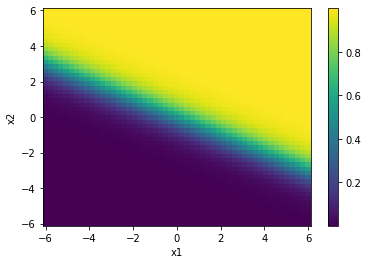

In [76]:
plt.pcolor(gridx1, gridx2, z)
plt.xlabel("x1")
plt.ylabel("x2")
plt.colorbar()

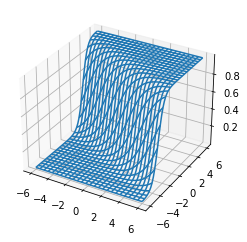

In [77]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_wireframe(gridx1, gridx2, z)

In [78]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver="lbfgs")
clf.fit(sgx, sgy)

LogisticRegression()

In [79]:
print(gridx1.shape, gridx2.shape)

(51, 51) (51, 51)


In [80]:
grid = np.c_[gridx1.flatten(), gridx2.flatten()]
prob = clf.predict_proba(grid)
prob.shape

(2601, 2)

Text(0, 0.5, 'x2')

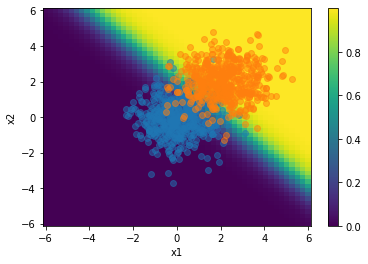

In [81]:
# note that prob[:,1] returns, for all exemples,
# the probability p to belong to category 1. 
# prob[:,0] would return the probability to belong 
# to category 0 (which is 1-p)
plt.pcolor(gridx1, gridx2, prob[:, 1].reshape(npoints, npoints))
plt.colorbar()
plt.scatter(sgx0[:, 0], sgx0[:, 1], alpha=0.5)
plt.scatter(sgx1[:, 0], sgx1[:, 1], alpha=0.5)
plt.xlabel("x1")
plt.ylabel("x2")